In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

In [36]:
import numpy as np

def sample_spiked_cumulant(spike_vector: np.ndarray, n_points: int, snr: float) -> np.ndarray:
    """
    Generate samples from a spiked covariance model.

    Parameters
    ----------
    spike_vector : np.ndarray, shape (d,)
        The d-dimensional spike direction (must be unit-norm).
    n_points : int
        Number of samples (columns) to generate.
    snr : float
        Signal-to-noise ratio in [0, 1].

    Returns
    -------
    np.ndarray
        Matrix of shape (d, n_points) containing the generated samples.

    Notes
    -----
    The model is:
        X = Z + snr * (u ⊗ h) + (sqrt(1 - snr**2) - 1) * (u uᵀ Z)
    where:
        - Z ~ N(0, I) are Gaussian noise samples,
        - h ∈ {−1, +1}^n_points are Rademacher latent variables,
        - u is the spike_vector.
    """
    # Check that spike_vector is approximately unit-norm
    norm_u = np.linalg.norm(spike_vector)
    if not np.isclose(norm_u, 1.0, atol=1e-6):
        raise ValueError(f"spike_vector must have unit norm (‖u‖ ≈ 1), got {norm_u:.6f}")

    # Basic input validation
    if not (0 <= snr <= 1):
        raise ValueError(f"SNR must be between 0 and 1, got {snr}")

    d = spike_vector.shape[0]
    x = np.random.randn(d, n_points)  # Gaussian noise
    h = np.sign(np.random.randn(n_points))  # Random ±1 signs

    # Construct spike and whitening terms
    spike_term = np.outer(spike_vector, h)
    whitening_term = spike_vector[:, None] @ (spike_vector[None, :] @ x)

    # Apply SNR and sum
    x += snr * spike_term + (np.sqrt(1 - snr**2) - 1) * whitening_term

    return x


In [37]:
u=np.zeros(10)
u[0]=1
X=sample_spiked_cumulant(u,10000,.9)
X[0,:].var()

1.0011888787953855

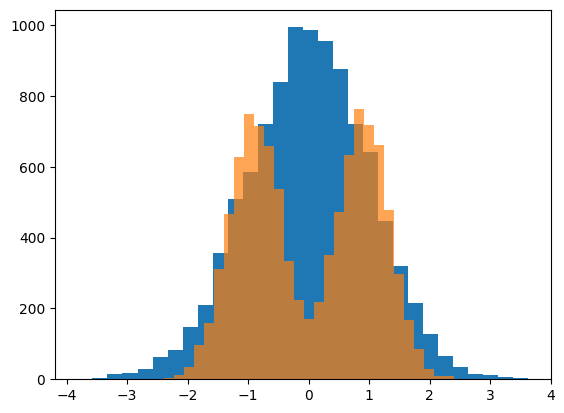

In [38]:
plt.hist(X[1,:],bins=30)
plt.hist(X[0,:],bins=30,alpha=.7)
plt.show()